In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import networkx as nx
import music21 as msc
from funciones import *
import sys
import os
from music21 import corpus

#env = msc.environment.UserSettings()
#env['musicxmlPath'] = r'C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe' #Path a la aplicacion Finale
#env['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'          #Path a la aplicacion MuseScore 
#env['musicxmlPath']='/usr/bin/mscore'
#msc.environment.set('musescoreDirectPNGPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')
#msc.environment.set('musicxmlPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')


In [ ]:
#---------------------------------------------------------------------
#Funciones:
#Lista de funciones:
# f_xml2graph (cancion, nombre_parte=0,modelo='melodia')
# graficar (G, color_map='rainbow',layout='espiral', labels=False)
# ql_2_fig (ql)
# f_motifs_rhytmic (cancion,length,nombre_parte=0)
# f_motifs_tonal (cancion,length,nombre_parte=0)
# f_grado_dist_M (G)
# f_grado_dist_R (G)
# f_tabla (G,nombre)
# f_xml2graph_armonia (cancion, index)
# f_armon (cancion, indexes)
# f_graficar_armonias_undirected(G, color_map='rainbow',layout='espiral')
# f_grafo_armonias_directed(Armonias)
# f_dist_escalas (cancion, nombre_parte=0)
# f_full_graph(path)
# f_hierarchy(G)
# f_transitivity_motifs(G)
# f_rewiring_directed(G)
# f_voices(path, modelo='melodia')
# f_merge(dict1,dict2,modelo='directed')
# f_graficar_armonias_directed(G, layout='random',labels=False)

In [2]:
#---------------------------------------------------------------------------------------
#Análisis de ARTISTAS (todas las voces pegoteadas)
#---------------------------------------------------------------------
#Empecemos con un analisis de un artista, lo pasamos a 2 y después lo pasamos a género
#Para clásica, usamos la base de datos de music21, para Bach son muchisimas asi que pruebo con Mozart que son 16 (tarda 1min)

#musicos_1 = ['mozart', 'bach', 'beethoven'] #son los más conocidos y que más biblio tienen 
musicos_1 = ['mozart']
#creo una lista que contenga los grafos con cada artista, va a ser una ls de ls de 5 elemen: [[M,A,R,D,U]]
H = [] # Lista para los clasicos
K = [] # Lista para los populares
G = [] # Lista completa de cada artista + 5 grafos (melodia, absoluta (dist a tonica), ritmo, arm dirigida, arm no dirigida)

for l, musico in enumerate(musicos_1):
    # Para cada musico clasico, agrega a la lista H los 4 grafos completos de cada obra
    m = nx.DiGraph()
    a = nx.DiGraph()
    r = nx.DiGraph()
    ad= nx.MultiDiGraph()
    au= nx.MultiGraph()
    paths = corpus.getComposer(musico)
    paths = paths[0:10] #corta hasta los primeros 20 temas
    for i, path in enumerate(paths):
        # Crea los cuatro grafos para cada cancion y los agrega a H como un único elemento
        M1,A1,R1,D1,U1 = f_full_graph(path)
        H.append([M1,A1,R1,D1,U1])
        
    for l in range(len(H)):
        # Recorre cada elemento de H (listas de cuatro grafos) y une los correspondientes
        m = nx.compose(m,H[l][0])
        #a = nx.compose(a,H[l][1])
        r = nx.compose(r,H[l][2])
        #ad= nx.compose(ad,H[l][3])
        #au= nx.compose(au,H[l][4])
    G.append([musico,m,a,r,ad,au])
    # Agrega a G la lista de artista + 4 grafos completos por artista

# Ahora buscamos los artistas que nosotros encontramos, vamos a trabajar con los beatles
#musicos_2 = ['Beatles','Charly'] #aca se podrian ir agregando si trabajasemos con más tipo Queen y Charly
musicos_2 = ['Charly']
# REVISAR BIEN SI LAS VOCES "SIRVEN"

for l, musico in enumerate(musicos_2):
    m = nx.DiGraph()
    a = nx.DiGraph()
    r = nx.DiGraph()
    ad= nx.MultiDiGraph()
    au= nx.MultiGraph()
    myFolder = (os.getcwd()+'\\partituras\\Rock\\'+musico) # busca en el directorio actual
    arch = os.listdir(myFolder) #lista con los nombres de las canciones
    paths = [] #lista con las direcciones completas
    for i, arc in enumerate(arch):
        paths.append(myFolder+'\\'+arc)

    paths = paths[0:20]
    for i, path in enumerate(paths):
        M2,A2,R2,D2,U2 = f_full_graph(path)
        K.append([M2,A2,R2,D2,U2])
        
    for l in range(len(K)):
        m = nx.compose(m,K[l][0])
        #a = nx.compose(a,K[l][1])
        r = nx.compose(r,K[l][2])
        #ad= nx.compose(ad,K[l][3])
        #au= nx.compose(au,K[l][4])
    G.append([musico,m,a,r,ad,au]) 

musicos = musicos_1 + musicos_2

In [3]:
for l, musico in enumerate(musicos_1):
    paths = corpus.getComposer(musico)
    paths = paths[0:20] #corta hasta los primeros 20 temas
    for i, path in enumerate(paths):
        print(path)

C:\Users\Lucio\Anaconda3\Lib\site-packages\music21\corpus\mozart\k155\movement1.mxl
C:\Users\Lucio\Anaconda3\Lib\site-packages\music21\corpus\mozart\k155\movement2.mxl
C:\Users\Lucio\Anaconda3\Lib\site-packages\music21\corpus\mozart\k155\movement3.mxl
C:\Users\Lucio\Anaconda3\Lib\site-packages\music21\corpus\mozart\k156\movement1.mxl
C:\Users\Lucio\Anaconda3\Lib\site-packages\music21\corpus\mozart\k156\movement2.mxl
C:\Users\Lucio\Anaconda3\Lib\site-packages\music21\corpus\mozart\k156\movement3.mxl
C:\Users\Lucio\Anaconda3\Lib\site-packages\music21\corpus\mozart\k156\movement4.mxl
C:\Users\Lucio\Anaconda3\Lib\site-packages\music21\corpus\mozart\k458\movement1.mxl
C:\Users\Lucio\Anaconda3\Lib\site-packages\music21\corpus\mozart\k458\movement2.mxl
C:\Users\Lucio\Anaconda3\Lib\site-packages\music21\corpus\mozart\k458\movement3.mxl
C:\Users\Lucio\Anaconda3\Lib\site-packages\music21\corpus\mozart\k458\movement4.mxl
C:\Users\Lucio\Anaconda3\Lib\site-packages\music21\corpus\mozart\k545\moveme

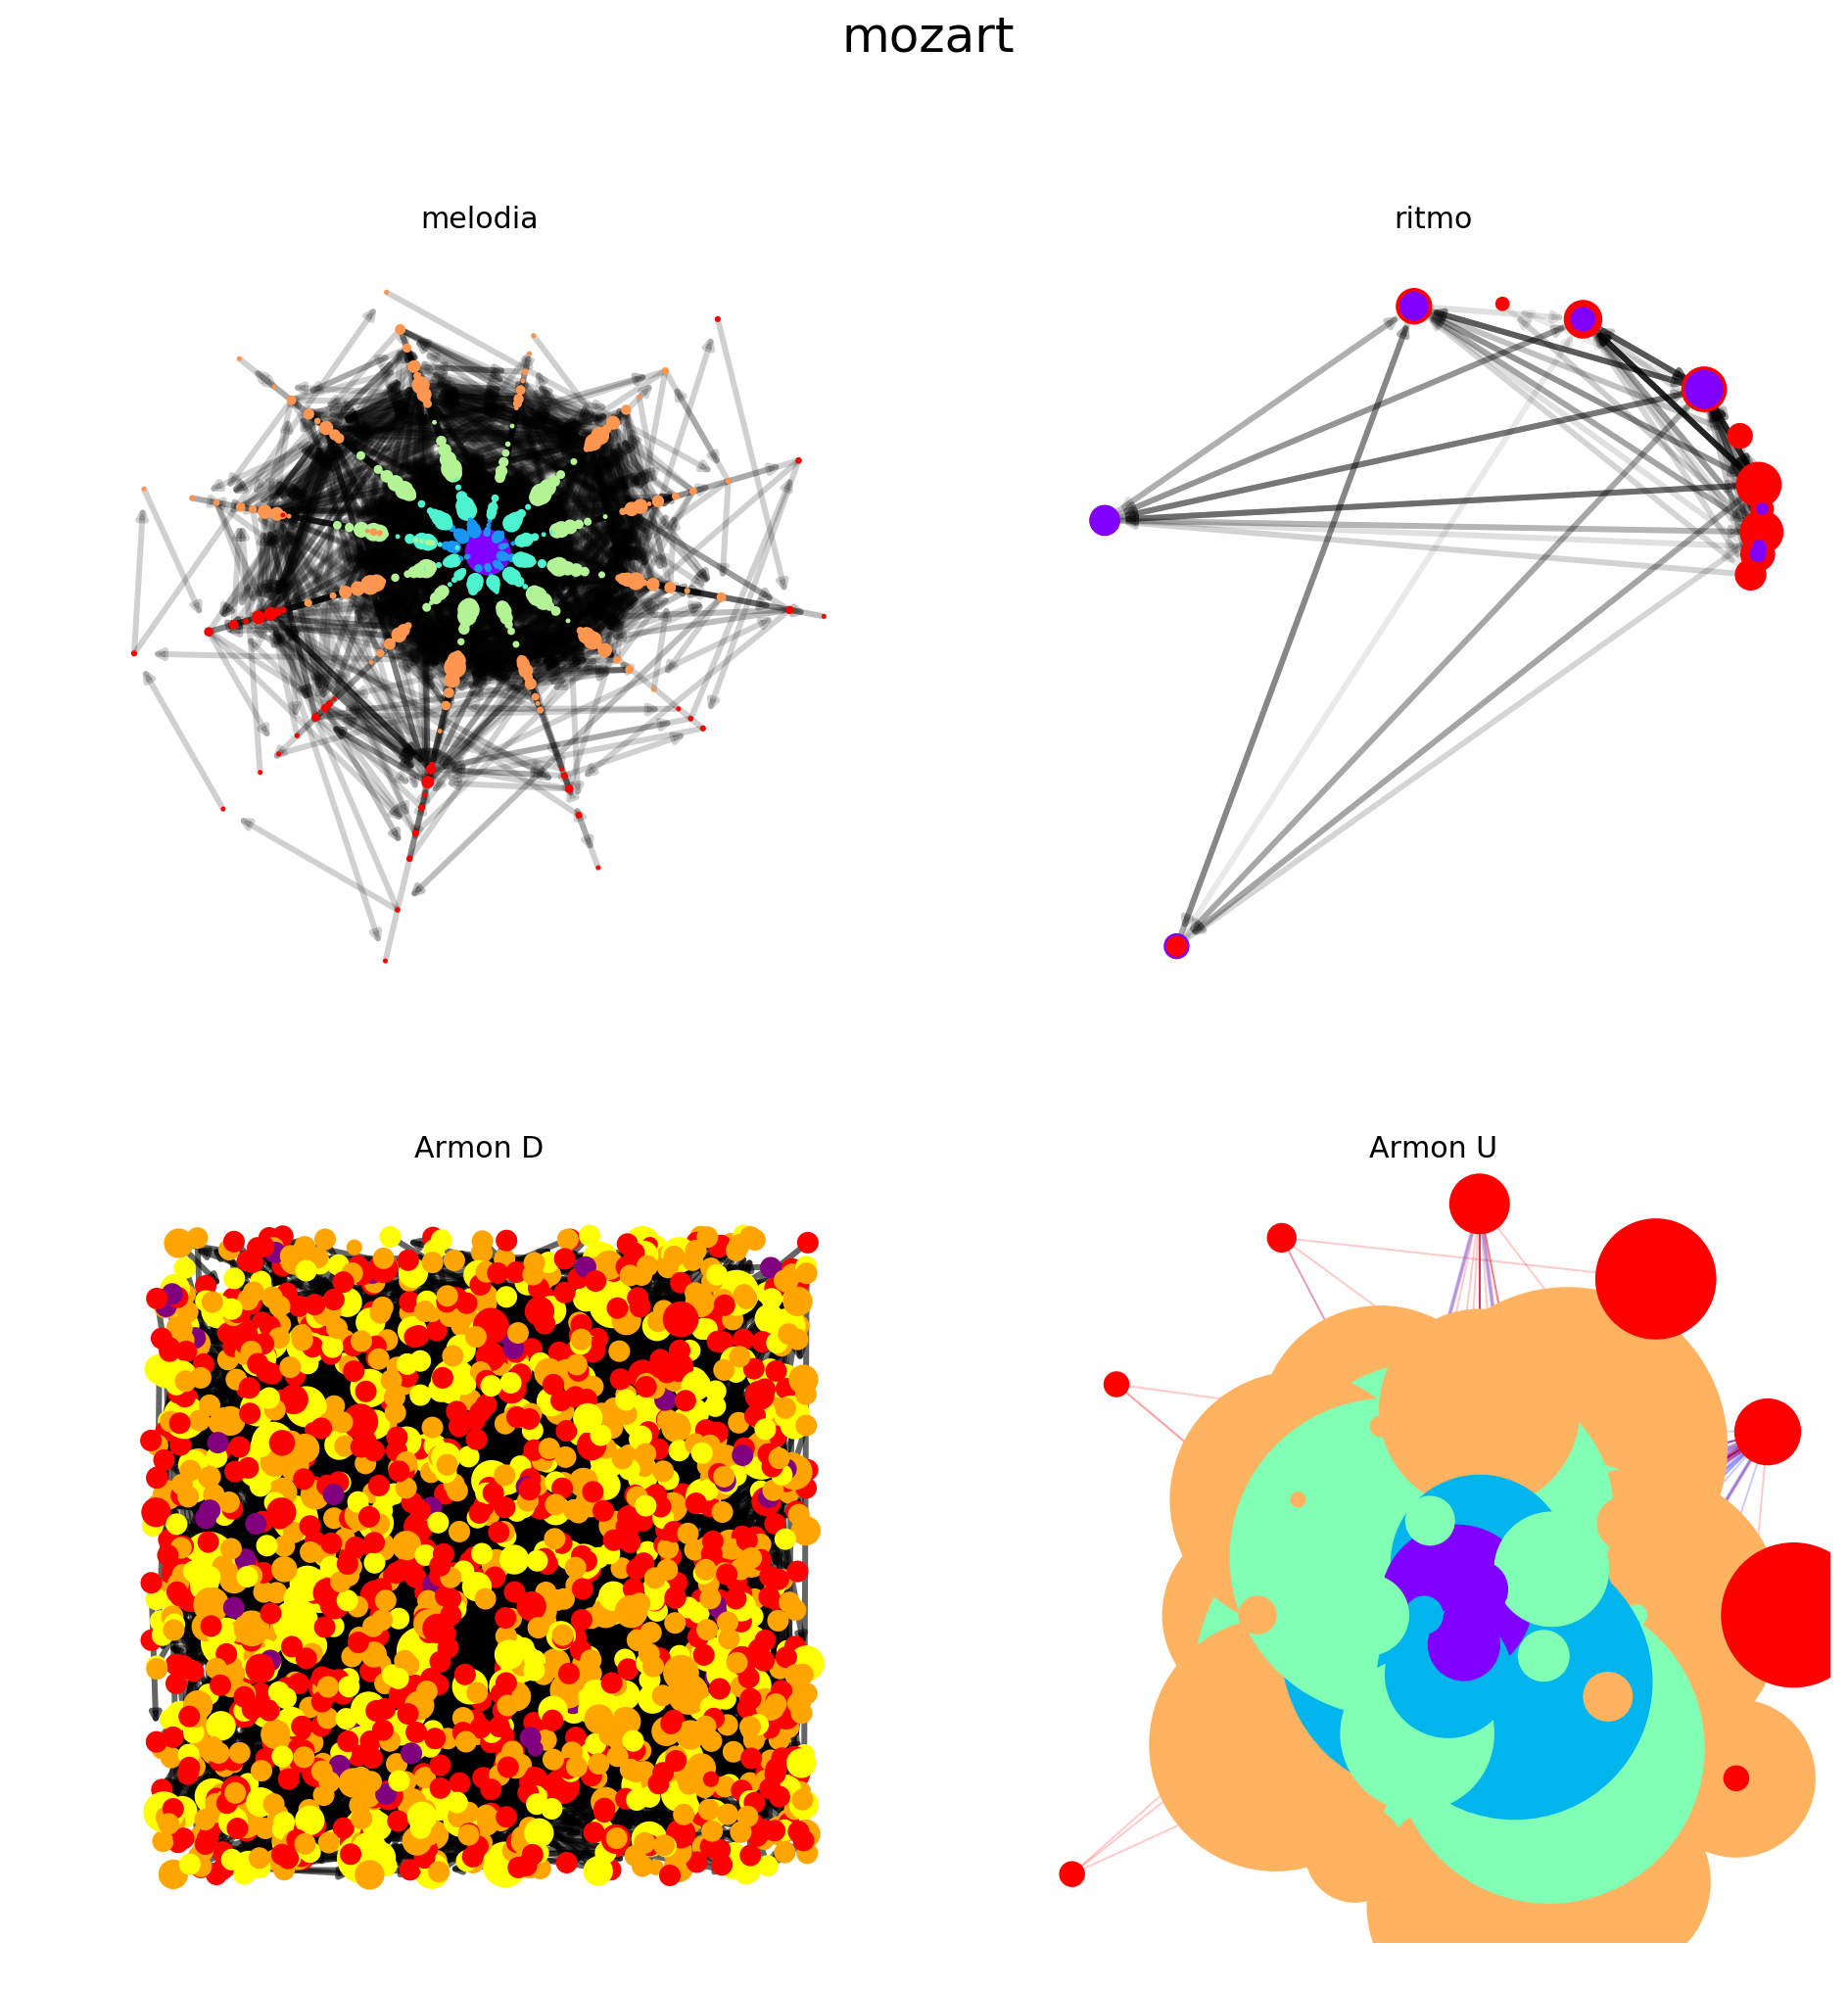

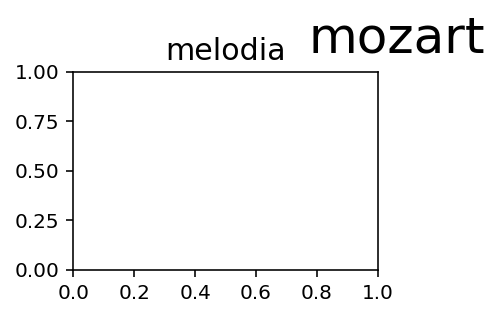

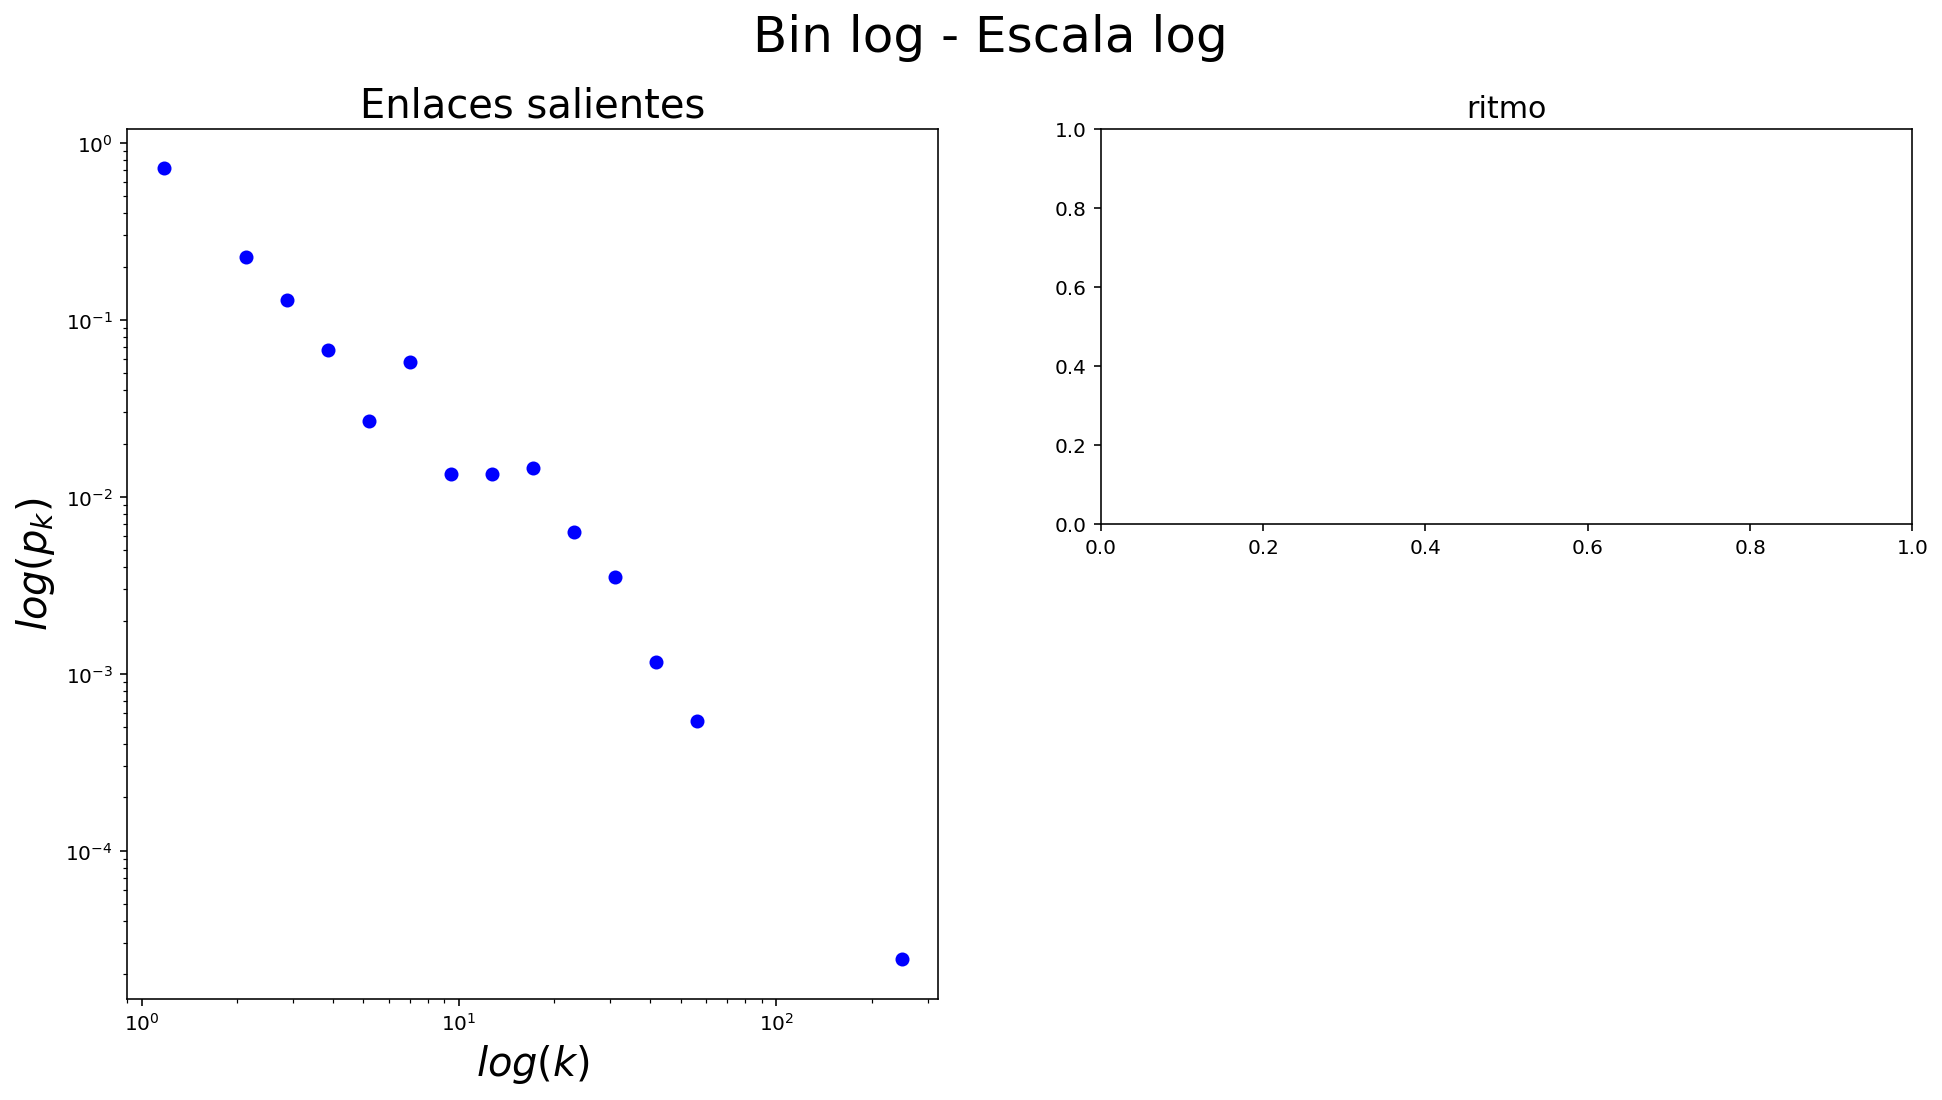

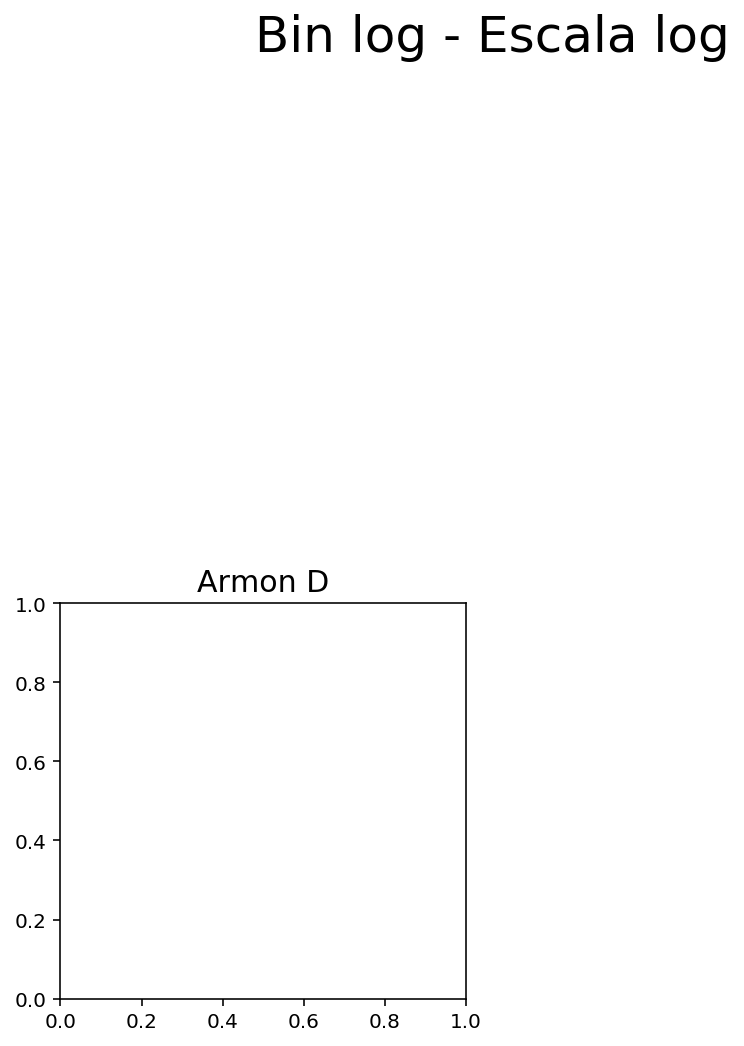

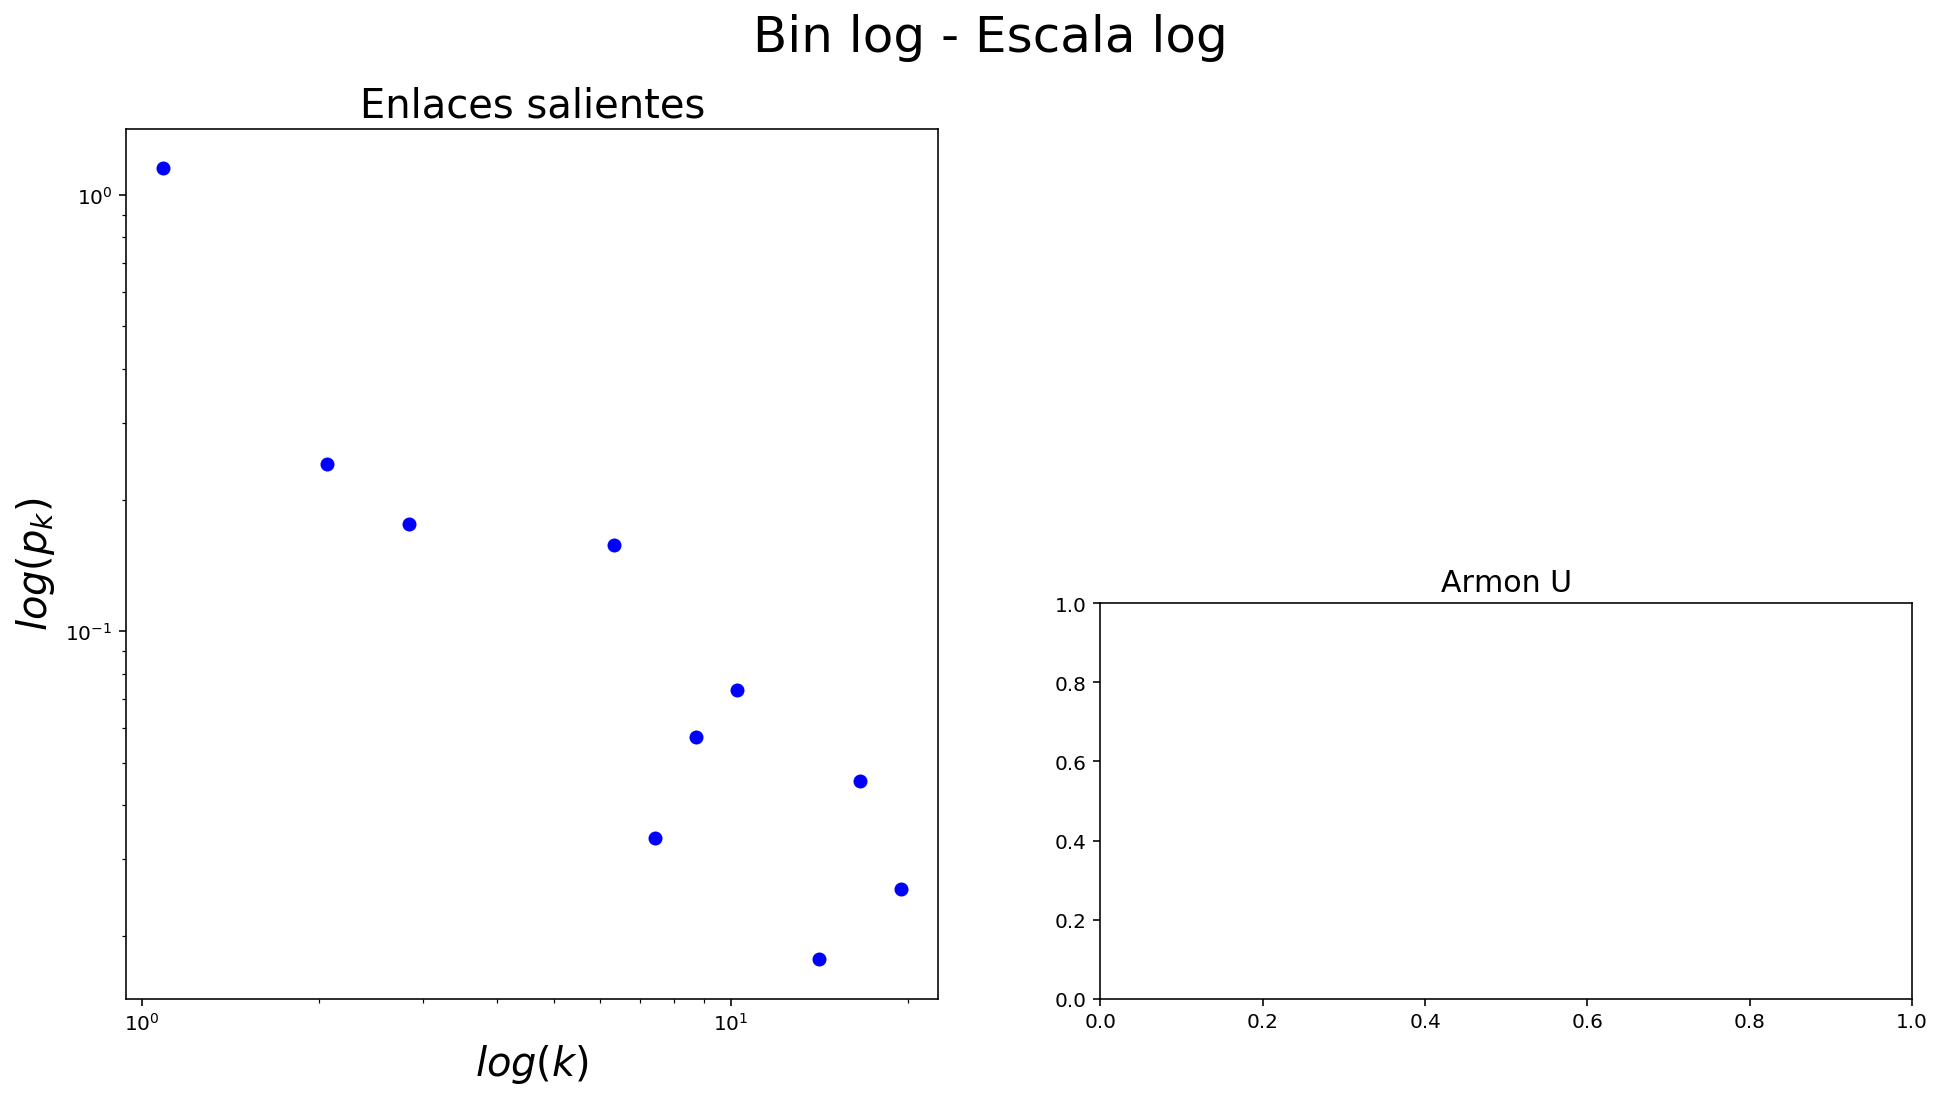

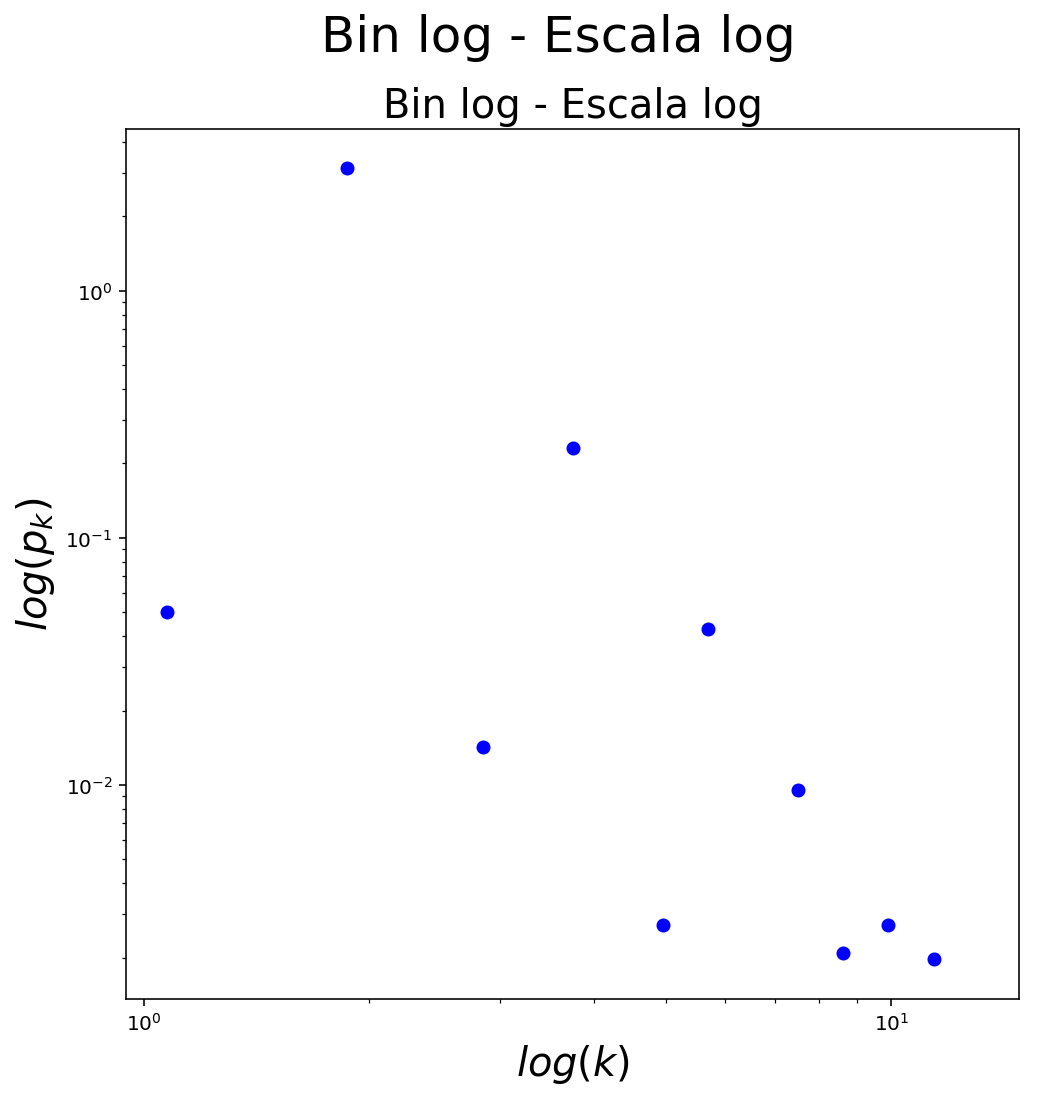

NetworkXNotImplemented: not implemented for multigraph type

In [7]:
#---------------------------------------------------------------------
#Graficamos todos los artistas  
#outfolder ='C:/Users/Lucio/Desktop/FACULTAD/Redes/datos/datosTPE/'

for l,musico in enumerate(musicos):

    plt.figure(figsize=(16,16))
    plt.suptitle(musico,fontsize=25)
    
    plt.subplot(2, 2, 1)
    plt.title('melodia',fontsize=15)
    graficar(G[l][1],color_map='rainbow',layout='espiral',labels=False)

    plt.subplot(2, 2, 2)
    plt.title('ritmo',fontsize=15)
    graficar(G[l][3],color_map='rainbow',layout='espiral',labels=False)
    
    plt.subplot(2, 2, 3)
    plt.title('Armon D',fontsize=15)
    f_graficar_armonias_directed(G[l][4],labels=False)
    
    plt.subplot(2, 2, 4)
    plt.title('Armon U',fontsize=15)
    f_graficar_armonias_undirected(G[l][5],labels=False)

    #plt.savefig(outfolder+musico+'_grafos.png')
    plt.show()

#---------------------------------------------------------------------
    #Graficamos sus distribuciones de grados y creamos una tabla 
    #plt.figure(figsize=(16,16))
    plt.suptitle(musico,fontsize=25)
    plt.subplot(2, 2, 1)
    plt.title('melodia',fontsize=15)
    f_grado_dist(G[l][1],'directed')

    plt.subplot(2, 2, 2)
    plt.title('ritmo',fontsize=15)
    f_grado_dist(G[l][2],'undirected')
    
    plt.subplot(2, 2, 3)
    plt.title('Armon D',fontsize=15)
    f_grado_dist(G[l][3],'directed')
    
    plt.subplot(2, 2, 4)
    plt.title('Armon U',fontsize=15)
    f_grado_dist(G[l][4],'undirected')
    
    #plt.savefig(outfolder+musico+'_distribuciones.png')
    plt.show()

    pd_m=f_tabla(G[l][1],musico)
    pd_r=f_tabla(G[l][2],musico)
    pd_AD=f_tabla(G[l][3],musico)
    pd_AU=f_tabla(G[l][4],musico)
    frames = [pd_m, pd_r, pd_AD, pd_AU]
    result = pd.concat(frames)
    #result.to_csv(outfolder+musico)
    
#---------------------------------------------------------------------

result


In [ ]:
#---------------------------------------------------------------------------------------
#Análisis por GÉNERO
#---------------------------------------------------------------------
#¡POR SUERTE! separamos los musicos por género (?)
#Veamos Clasico vs Rock, para eso vamos a hacer los mismos análisis pero vamos a pegotear todavia más los grafos
#Tomamos la parte correspondiente de G que es de clásico
Lclasic=len(musicos_1)
Lrock=len(musicos_2)

#creo una lista de grafos que va a tener todas las tuples de melodia y ritmo para clasica y rock
clasicos_mel=[]
clasicos_rit=[]
clasicos_armonD=[]
clasicos_armonU=[]

rock_mel=[]
rock_rit=[]
rock_armonD=[]
rock_armonU=[]

M_cl=nx.DiGraph()
R_cl=nx.Graph()
AD_cl=nx.DiGraph()
AU_cl=nx.Graph()

M_rk=nx.DiGraph()
R_rk=nx.Graph()
AD_rk=nx.DiGraph()
AU_rk=nx.Graph()

H=[] #creo una lista que contenga los grafos con cada genero, va a ser una ls de ls de 4 elemen: [[M,R,D,U]]
generos=('clasico', 'rock')
for i,mus in enumerate(musicos):
    if i <= Lclasic:
        clasicos_mel.append(G[i][0])
        clasicos_rit.append(G[i][1])
        clasicos_armonD.append(G[i][2])
        clasicos_armonU.append(G[i][3])
    else:
        rock_mel.append(G[i][0])
        rock_rit.append(G[i][1])
        rock_armonD.append(G[i][2])
        rock_armonU.append(G[i][3])
        
#Listo ya separamos en género, ahora vamos a mergearlos
#primero los clasicos
for i, g in enumerate(clasicos_mel):
    M_cl=nx.compose(M_cl,clasicos_mel[i])
    R_cl=nx.compose(R_cl,clasicos_rit[i])
    AD_cl=nx.compose(AD_cl, clasicos_armonD[i])
    AU_cl=nx.compose(AU_cl, clasicos_armonU[i])

H.append([M_cl, R_cl, AD_cl, AU_cl])

#ahora el rock
for i, g in enumerate(rock_mel):
    M_rk=nx.compose(M_rk,rock_mel[i])
    R_rk=nx.compose(R_rk,rock_rit[i])
    AD_rk=nx.compose(AD_rk, rock_armonD[i])
    AU_rk=nx.compose(AU_rk, rock_armonU[i])

H.append([M_rk, R_rk, AD_rk, AU_rk])

    

In [ ]:
#---------------------------------------------------------------------
#Graficamos ambos grafos 
outfolder ='C:/Users/Lucio/Desktop/FACULTAD/Redes/datos/datosTPE/'

for l,gen in enumerate(generos):

    plt.figure(figsize=(16,16))
    plt.suptitle(gen,fontsize=25)
    plt.subplot(2, 2, 1)
    plt.title('melodia',fontsize=15)
    graficar(H[l][0],labels=False)
    plt.subplot(2, 2, 2)
    plt.title('ritmo',fontsize=15)
    graficar(H[l][1],labels=False)
    plt.subplot(2, 2, 3)
    plt.title('Armon D',fontsize=15)
    graficar(H[l][3],labels=False)
    plt.subplot(2, 2, 4)
    plt.title('Armon U',fontsize=15)
    graficar(H[l][3],labels=False)
    plt.savefig(outfolder+gen+'_grafos.png')
    plt.show()

#---------------------------------------------------------------------
    #Graficamos sus distribuciones de grados y creamos una tabla (son 2 por cada cancion en melodia y 1 por rítmica)
    plt.figure(figsize=(16,16))
    plt.suptitle(gen,fontsize=25)
    plt.subplot(2, 2, 1)
    plt.title('melodia',fontsize=15)
    f_grado_dist_M(H[l][0])
    plt.subplot(2, 2, 2)
    plt.title('ritmo',fontsize=15)
    f_grado_dist_R(H[l][1])
    plt.subplot(2, 2, 3)
    plt.title('Armon D',fontsize=15)
    f_grado_dist_M(H[l][3])
    plt.subplot(2, 2, 4)
    plt.title('Armon U',fontsize=15)
    f_grado_dist_R(H[l][3])
    
    plt.savefig(outfolder+gen+'_distribuciones.png')
    plt.show()

    pd_m=f_tabla(H[l][0],musico)
    pd_r=f_tabla(H[l][1],musico)
    pd_AD=f_tabla(H[l][2],musico)
    pd_AU=f_tabla(H[l][3],musico)
    frames = [pd_m, pd_r,pd_AD,pd_AU]
    result = pd.concat(frames)
    result.to_csv(outfolder+gen)
    
#---------------------------------------------------------------------
result


In [ ]:
#---------------------------------------------------------------------------------------
#Análisis por Etapa??
#---------------------------------------------------------------------

# Beatles

In [2]:
# Ahora buscamos los artistas que nosotros encontramos, vamos a trabajar con los beatles
#musicos_2 = ['Beatles','Charly'] #aca se podrian ir agregando si trabajasemos con más tipo Queen y Charly
musicos_2 = ['Beatles']
# REVISAR BIEN SI LAS VOCES "SIRVEN"
H = [] # Lista para los clasicos
K = [] # Lista para los populares
G = [] # Lista completa de cada artista + 5 grafos (melodia, absoluta (dist a tonica), ritmo, arm dirigida, arm no dirigida)
for l, musico in enumerate(musicos_2):
    m = nx.DiGraph()
    a = nx.DiGraph()
    r = nx.DiGraph()
    ad= nx.MultiDiGraph()
    au= nx.MultiGraph()
    myFolder = (os.getcwd()+'/partituras/Rock/'+musico) # busca en el directorio actual
    arch = os.listdir(myFolder) #lista con los nombres de las canciones
    paths = [] #lista con las direcciones completas
    indices = []
    for i, arc in enumerate(arch):
        nombre = myFolder+'/'+arc
        paths.append(nombre)
        c = int(nombre.replace(".mxl", "").replace(".xml", "").split('.')[-1])
        indices.append(c)

    paths = paths[0:4]
    for i, path in enumerate(paths):
        M2,A2,R2,D2,U2 = f_full_graph(path,voz_principal=indices[i])
        K.append([M2,A2,R2,D2,U2])
    for l in range(len(K)):
        m = f_compose(m,K[l][0])
        a = f_compose(a,K[l][1])
        r = f_compose(r,K[l][2])
        #ad= f_compose(ad,K[l][3])
        #au= f_compose(au,K[l][4])
    G.append([musico,m,a,r,ad,au]) 

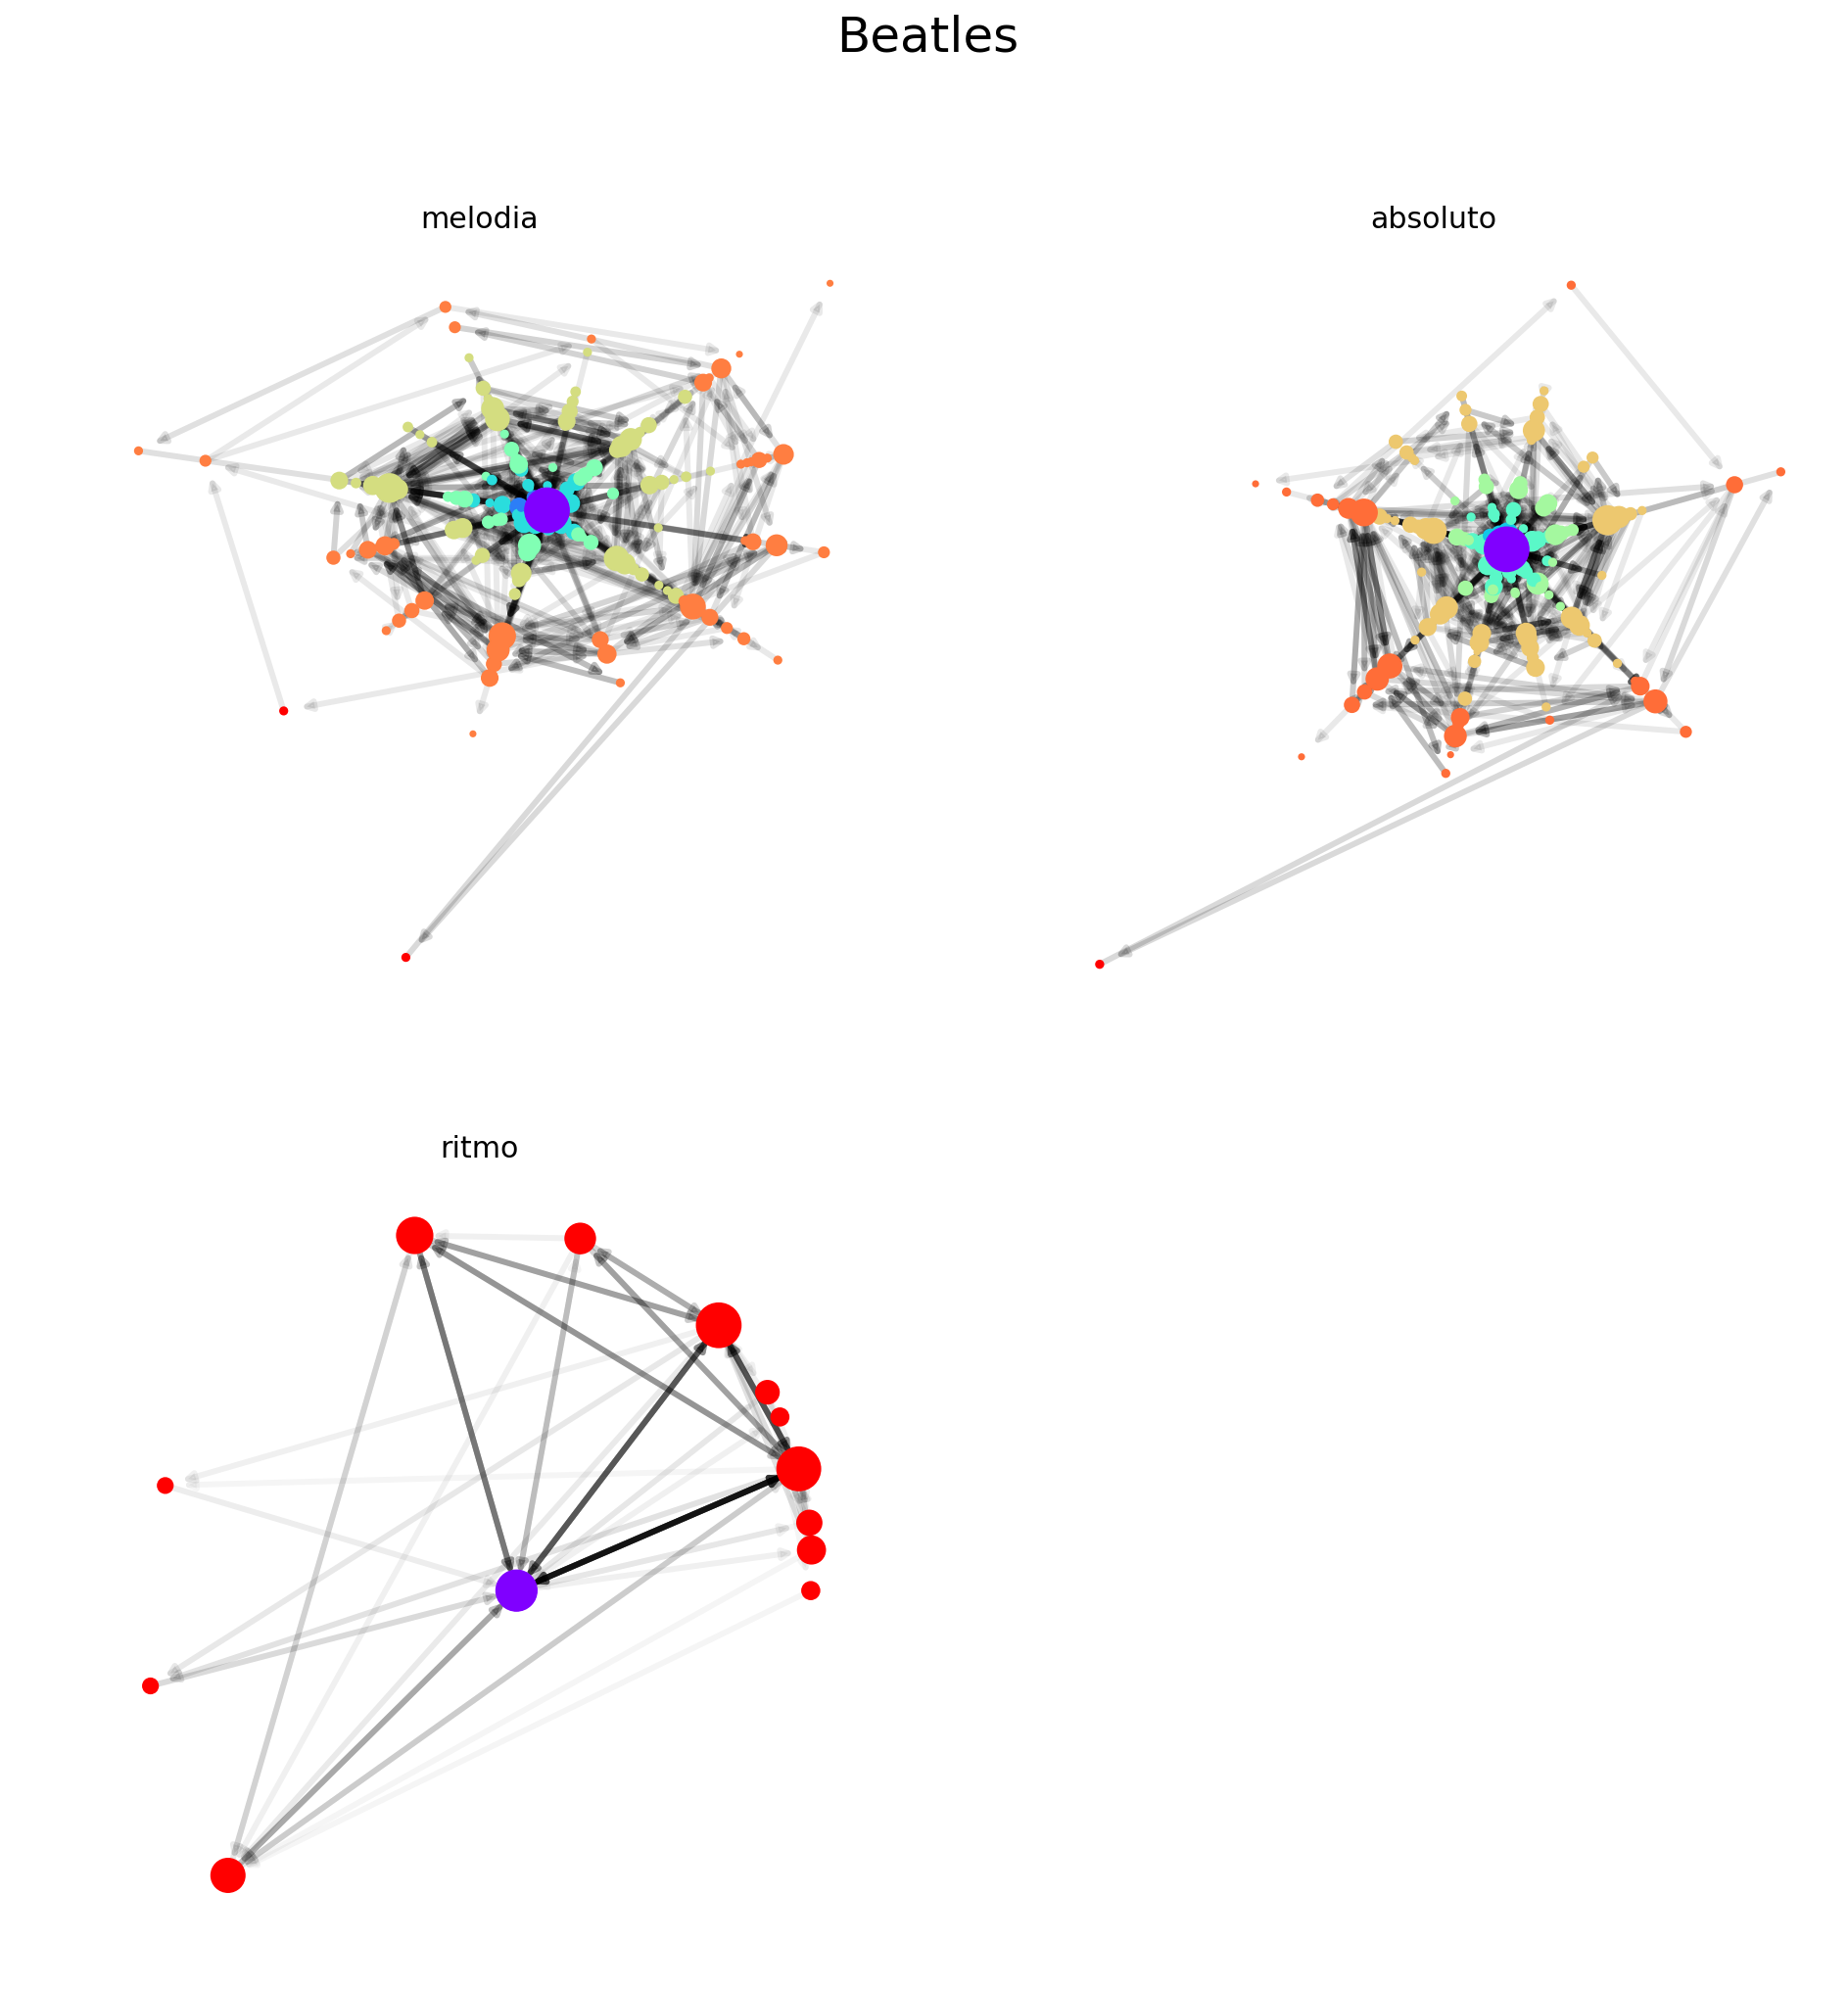

In [3]:
#Graficamos

for l,musico in enumerate(musicos_2):

    plt.figure(figsize=(16,16))
    plt.suptitle(musico,fontsize=25)
    
    plt.subplot(2, 2, 1)
    plt.title('melodia',fontsize=15)
    graficar(G[l][1])

    plt.subplot(2, 2, 2)
    plt.title('absoluto',fontsize=15)
    graficar(G[l][2])
    
    plt.subplot(2, 2, 3)
    plt.title('ritmo',fontsize=15)
    graficar(G[l][3],layout='circular')
    
    #plt.subplot(2, 2, 3)
    #plt.title('Armon D',fontsize=15)
    #f_graficar_armonias_directed(G[l][4],labels=False)
    
    #plt.subplot(2, 2, 4)
    #plt.title('Armon U',fontsize=15)
    #f_graficar_armonias_undirected(G[l][5],labels=False)

    #plt.savefig(outfolder+musico+'_grafos.png')
    plt.show()


Partes: ['Voice', 'Electric Guitar', 'Electric Guitar', 'Bass Guitar', 'Drumset']. Parte seleccionada: Voice
Partes: ['Voice', 'Electric Guitar', 'Electric Guitar', 'Bass Guitar', 'Drumset']. Parte seleccionada: Electric Guitar
Partes: ['Voice', 'Electric Guitar', 'Electric Guitar', 'Bass Guitar', 'Drumset']. Parte seleccionada: Electric Guitar
Partes: ['Voice', 'Electric Guitar', 'Electric Guitar', 'Bass Guitar', 'Drumset']. Parte seleccionada: Bass Guitar
Partes: ['Voice', 'Electric Guitar', 'Electric Guitar', 'Bass Guitar', 'Drumset']. Parte seleccionada: Drumset
Partes: ['B♭ Trumpet', 'Electric Guitar', 'Bass Guitar', 'Organ', 'Harpsichord', 'Drumset']. Parte seleccionada: B♭ Trumpet
Partes: ['B♭ Trumpet', 'Electric Guitar', 'Bass Guitar', 'Organ', 'Harpsichord', 'Drumset']. Parte seleccionada: Electric Guitar
Partes: ['B♭ Trumpet', 'Electric Guitar', 'Bass Guitar', 'Organ', 'Harpsichord', 'Drumset']. Parte seleccionada: Bass Guitar
Partes: ['B♭ Trumpet', 'Electric Guitar', 'Bass G

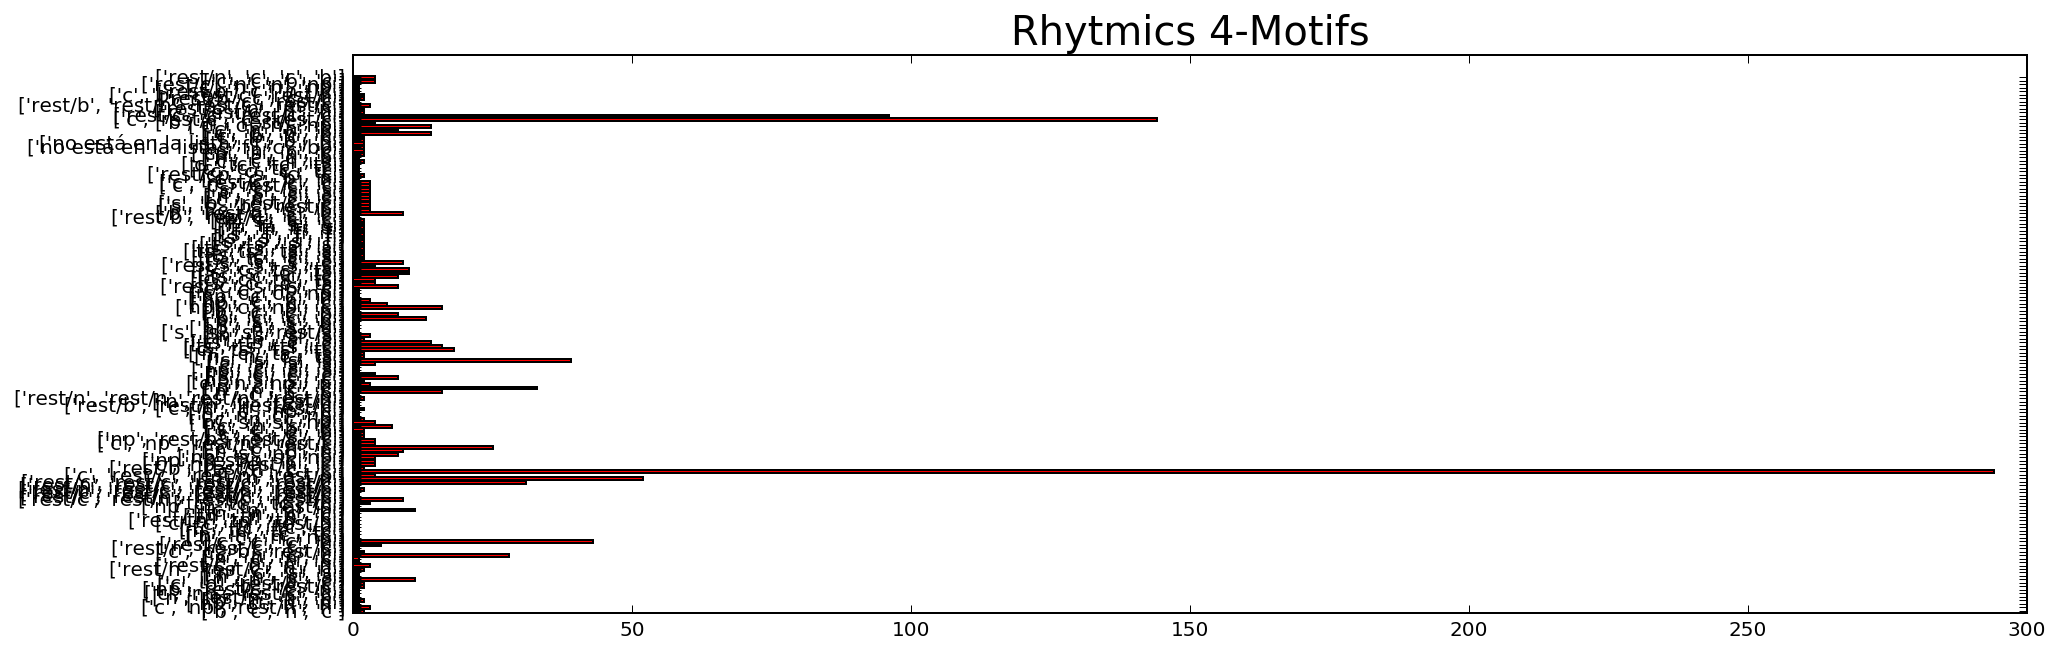

In [6]:
#Buscamos motivs ritmicos:
motifs_ryhtms=[]
motifs_frecuencias=[]
length=4 #tamano del motiv
for l,musico in enumerate(musicos_2):
    myFolder = (os.getcwd()+'/partituras/Rock/'+musico) # busca en el directorio actual
    arch = os.listdir(myFolder) #lista con los nombres de las canciones
    paths = [] #lista con las direcciones completas
    for i, arc in enumerate(arch):
        paths.append(myFolder+'/'+arc)
    paths = paths[0:4]
    for i, path in enumerate(paths):#recorro canciones primera voz de cada una
        song = msc.converter.parse(path)
        Lp = len(song.parts)#cantidad de partes
        for inst in range(0,Lp):
            (new_motifs,new_frecuencias)=f_motifs_rhytmic(path,length,nombre_parte=inst)
            for n,nm in enumerate(new_motifs):
                if (nm in motifs_ryhtms)==False:
                    motifs_ryhtms.append(nm)
                    motifs_frecuencias.append(new_frecuencias[n])
                else:
                    indice_motif=motifs_ryhtms.index(nm)
                    motifs_frecuencias[indice_motif]+=new_frecuencias[n]

#Grafico
plt.figure(figsize=(15,5))
yTick_position=[]
yTick_name=[]
contador=-1
contador_tick=-0.5
motif_umbral=0
for m,motif in enumerate(motifs_ryhtms):
    if motifs_frecuencias[m]>motif_umbral:
        contador+=1
        contador_tick+=1
        plt.barh(contador,motifs_frecuencias[m],color='red')
        yTick_position.append(contador_tick)
        yTick_name.append(motif)
plt.yticks(yTick_position,yTick_name, rotation=0,fontsize=10)
plt.title('Rhytmics '+str(length)+'-Motifs',fontsize=20)
plt.show() 

In [7]:
#Motivos ritmicos encontrados y su frecuencia de aparicion:
print(motifs_ryhtms)
print(motifs_frecuencias)


[['b', 'c', 'n', 'c'], ['c', 'np', 'rest/n', 'n'], ['np', 'c', 'n', 'n'], ['b', 'n', 'c', 'c'], ['n', 'rest/n', 'n', 'n'], ['c', 'np', 'rest/c', 'c'], ['np', 'rest/c', 'c', 'n'], ['c', 'c', 'b', 'rest/c'], ['c', 'b', 'rest/c', 'c'], ['n', 'n', 'n', 'c'], ['n', 'n', 'c', 's'], ['n', 'c', 's', 's'], ['rest/n', 'rest/c', 'c', 'n'], ['rest/c', 'c', 'n', 'n'], ['c', 'n', 'c', 'n'], ['n', 'c', 'n', 'c'], ['c', 'n', 'c', 'c'], ['c', 'c', 'b', 'rest/n'], ['rest/n', 'rest/c', 'c', 'c'], ['rest/c', 'c', 'c', 'c'], ['c', 'c', 'c', 'n'], ['n', 'c', 'n', 'np'], ['n', 'n', 'tc', 'tc'], ['n', 'tc', 'tc', 'tc'], ['tc', 'tc', 'tc', 'n'], ['c', 'c', 'n', 'rest/b'], ['rest/tn', 'tn', 'tn', 'n'], ['tn', 'tn', 'n', 'c'], ['tn', 'n', 'c', 'c'], ['c', 'n', 'n', 'n'], ['np', 'n', 'c', 'rest/n'], ['tc', 'tc', 'tc', 'tc'], ['rest/c', 'rest/n', 'rest/c', 'rest/n'], ['rest/c', 'rest/n', 'rest/c', 'rest/c'], ['rest/c', 'rest/c', 'rest/n', 'rest/c'], ['rest/n', 'rest/c', 'rest/c', 'rest/n'], ['rest/n', 'rest/c', 'r

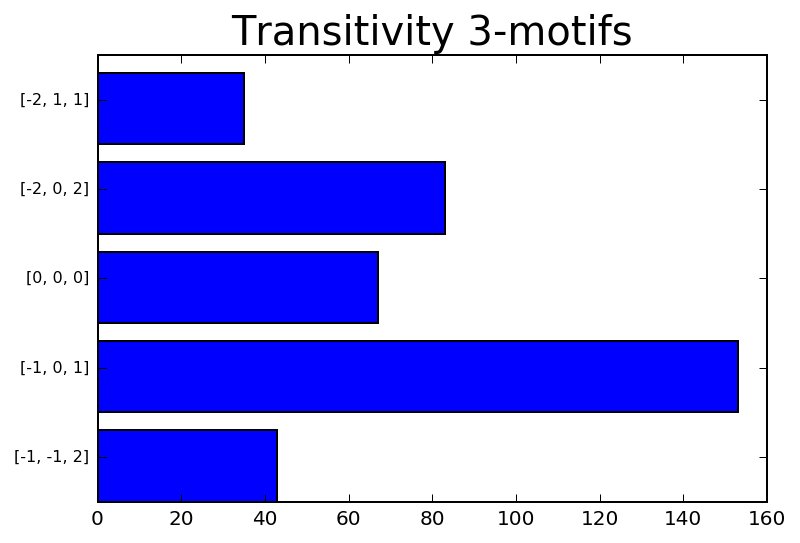

([['E3/0.5', 'B3/0.5', 'A3/0.5'],
  ['E3/0.5', 'G#3/0.5', 'A3/0.5'],
  ['E3/0.5', 'A3/0.5', 'G3/0.5'],
  ['E3/0.5', 'F2/0.5', 'C3/0.5'],
  ['E3/0.5', 'F2/0.5', 'G3/0.5'],
  ['E3/0.5', 'E2/0.5', 'B2/0.5'],
  ['D4/1/6', 'B3/0.5', 'E4/1/6'],
  ['D4/1/6', 'B3/0.5', 'D4/0.5'],
  ['G2/0.5', 'rest', 'F#2/0.5'],
  ['G2/0.5', 'rest', 'G3/0.5'],
  ['G2/0.5', 'A2/0.5', 'G2/1.0'],
  ['G2/0.5', 'A2/0.5', 'A3/0.5'],
  ['G2/0.5', 'A3/0.5', 'G3/0.5'],
  ['G5/0.5', 'rest', 'F#5/0.5'],
  ['G5/0.5', 'rest', 'E4/0.5'],
  ['G5/0.5', 'rest', 'E5/0.5'],
  ['G5/0.5', 'F#5/0.5', 'E5/0.5'],
  ['G5/0.5', 'E4/0.5', 'E5/0.5'],
  ['C5/1.0', 'C5/0.5', 'rest'],
  ['C5/1.0', 'C5/0.5', 'B4/0.5'],
  ['C5/1.0', 'C5/0.5', 'D5/0.5'],
  ['C5/1.0', 'rest', 'A4/1.0'],
  ['C5/1.0', 'rest', 'B4/0.5'],
  ['C5/1.0', 'rest', 'D5/0.5'],
  ['C5/1.0', 'rest', 'F4/2.0'],
  ['C5/1.0', 'rest', 'G4/1.0'],
  ['C5/1.0', 'rest', 'A4/2.0'],
  ['C5/1.0', 'A4/1.0', 'B4/0.5'],
  ['C5/1.0', 'A4/1.0', 'F4/2.0'],
  ['C5/1.0', 'A4/1.0', 'G4/1.0'],


In [5]:
#Buscamos cliques con direccion y analizamos su frecuencia de aparicion en el grafo melodico el cual es dirigido.
f_transitivity_motifs(G[l][1])